In [1]:
import sys

sys.path.append("C:/Users/junsu/volatility_arbitrage")

In [11]:
from volatility_arbitrage.pricing_model.interface import HestonParams
from volatility_arbitrage.pricing_model.heston_model import generate_cir_processs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ncx2

In [20]:
BDAYS = 252

length = 1
time_delta = 1 / BDAYS
realized_vol = 0.16
num_path = 1_000_000

heston_model = HestonParams(kappa=5, mean_of_var=realized_vol**2, vol_of_var=0.5, rho=-0.4)
np.random.seed(0)
normal_var = np.random.normal(size=(length, num_path))
var = generate_cir_processs(
    var_0=realized_vol**2,
    model_params=heston_model,
    normal_var=normal_var,
    num_path=num_path,
    length=length,
    time_delta=time_delta,
)

In [21]:
c = (
    2
    * heston_model.kappa
    / ((1 - np.exp(-heston_model.kappa * time_delta)) * heston_model.vol_of_var**2)
)
dof = 4 * heston_model.kappa * heston_model.mean_of_var / heston_model.vol_of_var**2
non_centrality = 2 * c * realized_vol**2 * np.exp(-heston_model.kappa * time_delta)

x = np.linspace(np.min(2 * c * var[1]), np.max(2 * c * var[1]), 100)
analytic_pdf = ncx2.pdf(x, df=dof, nc=non_centrality) * 2 * c

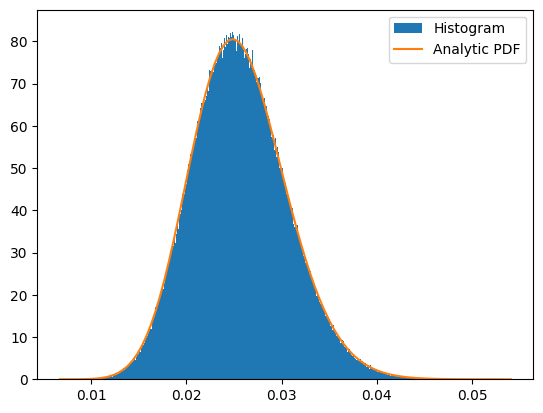

In [23]:
plt.hist(var[1], bins=int(np.sqrt(num_path)), density=True, label="Histogram")
plt.plot(x / (2 * c), analytic_pdf, label="Analytic PDF")
plt.legend()
plt.show()